In [71]:
import dataloader
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
torch.set_printoptions(precision=16)
np.set_printoptions(precision=64)
import sys
from torchvision.transforms import transforms

In [72]:
transform = transforms.Compose([
    transforms.ToTensor()  # Converts the image to a PyTorch tensor and scales it to [0, 1]
])

In [73]:
data = dataloader.LoadPreprocessed(r'Data/preprocessed',r'Data/ariel-data-challenge-2024/train_labels.csv',a_transform=transform,f_transform=transform)

torch.Size([1, 187, 32, 32]) torch.Size([1, 187, 282, 32])
torch.Size([1, 187, 283])


c:\Users\prana\Documents\Python_Stuff\Ariel-Data-Challenge-2024\dataloader.py:196: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  AIRS_data = torch.load(AIRS_data_path)
c:\Us

In [74]:
labels = np.zeros((len(data),283),dtype=np.float16)
fgs1 = np.zeros((len(data),187,32,32),dtype=np.float32)
airs = np.zeros((len(data),187,282,32),dtype=np.float32)

c:\Users\prana\Documents\Python_Stuff\Ariel-Data-Challenge-2024\dataloader.py:196: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  AIRS_data = torch.load(AIRS_data_path)
c:\Us

torch.Size([187, 282, 32])

In [75]:
for i,j in enumerate(data):
    labels[i] = j['labels'].numpy()

loading data ...:   0%|          | 0/673 [00:00<?, ?it/s]c:\Users\prana\Documents\Python_Stuff\Ariel-Data-Challenge-2024\dataloader.py:196: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimenta

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

array([0.0010852813720703, 0.0011377334594727, 0.0011310577392578,
       0.0011234283447266, 0.0011386871337891, 0.0011301040649414,
       0.0011224746704102, 0.0011272430419922, 0.0011205673217773,
       0.0011167526245117, 0.0011148452758789, 0.0011167526245117,
       0.0011205673217773, 0.0011205673217773, 0.0011138916015625,
       0.001103401184082 , 0.0011043548583984, 0.0011014938354492,
       0.0010929107666016, 0.0010881423950195, 0.0010852813720703,
       0.0010881423950195, 0.0010862350463867, 0.0010814666748047,
       0.0010795593261719, 0.0010757446289062, 0.0010700225830078,
       0.0010671615600586, 0.0010662078857422, 0.0010690689086914,
       0.001072883605957 , 0.0010719299316406, 0.0010709762573242,
       0.0010738372802734, 0.0010766983032227, 0.0010776519775391,
       0.0010757446289062, 0.0010709762573242, 0.0010709762573242,
       0.0010747909545898, 0.0010757446289062, 0.0010786056518555,
       0.0010843276977539, 0.0010871887207031, 0.0010862350463

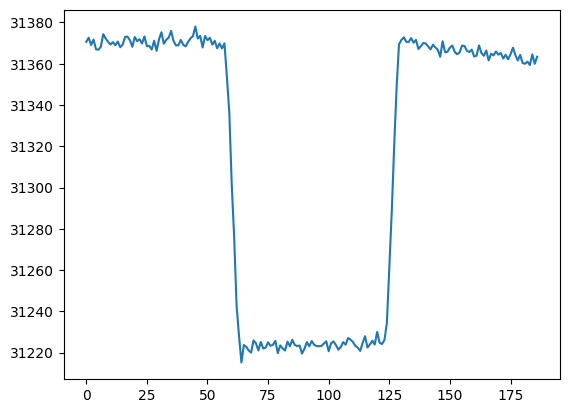

In [17]:
def get_mean_data_over_time(data, planet, sensor):
    values = data[planet]["signals"][sensor].mean(axis = 1).mean(axis = 1)
    return values
plt.plot(get_mean_data_over_time(data, 260, "AIRS"))

c:\Users\prana\Documents\Python_Stuff\Ariel-Data-Challenge-2024\.venv\Lib\site-packages\torch\nn\modules\conv.py:304: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Convolution.cpp:1032.)
  return F.conv1d(input, weight, bias, self.stride,


torch.Size([16, 187, 1128])
torch.Size([16, 187, 4512])
torch.Size([16, 187, 18048])


RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: []

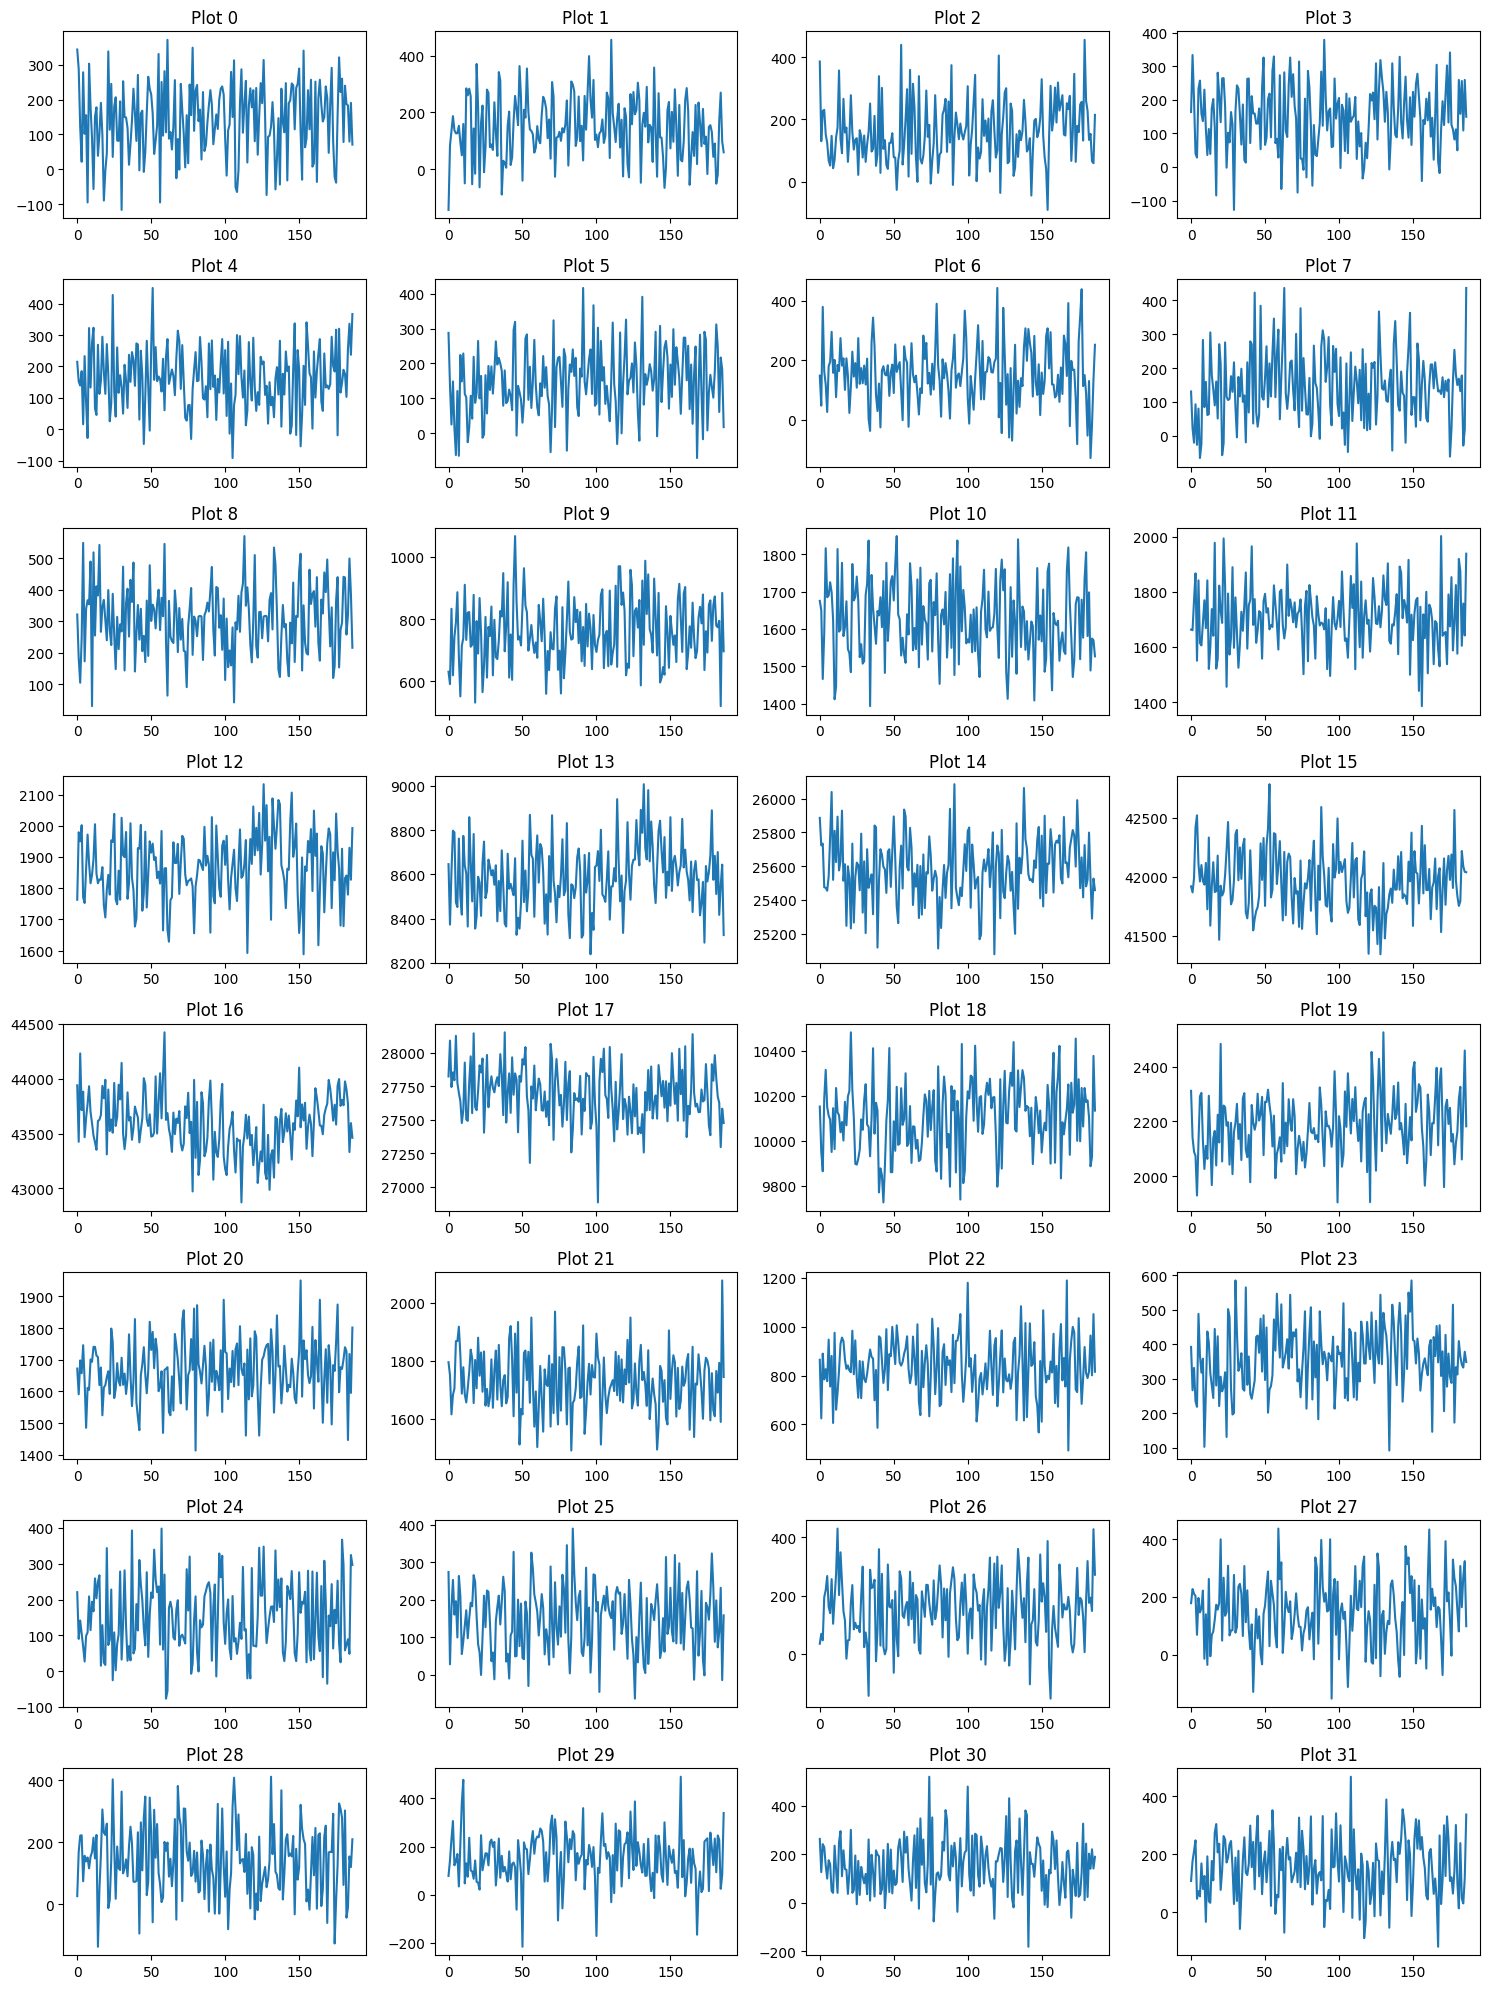

In [70]:


fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(15, 20))

for i in range(32):
    row = i // 4
    col = i % 4
    axes[row, col].plot(airs[1, :, 1, i])
    axes[row, col].set_title(f'Plot {i}')

plt.tight_layout()
plt.show()


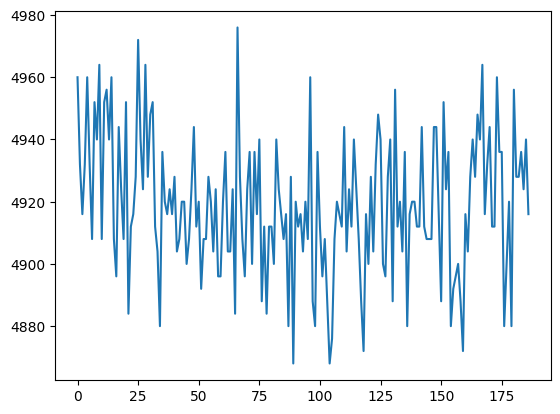

In [26]:
plt.figure()
plt.plot(airs[0,:,0,:].mean(axis=1))

In [6]:
label_name = ['w' + f'_{i}' for i in range(1,labels.shape[1]+1)]

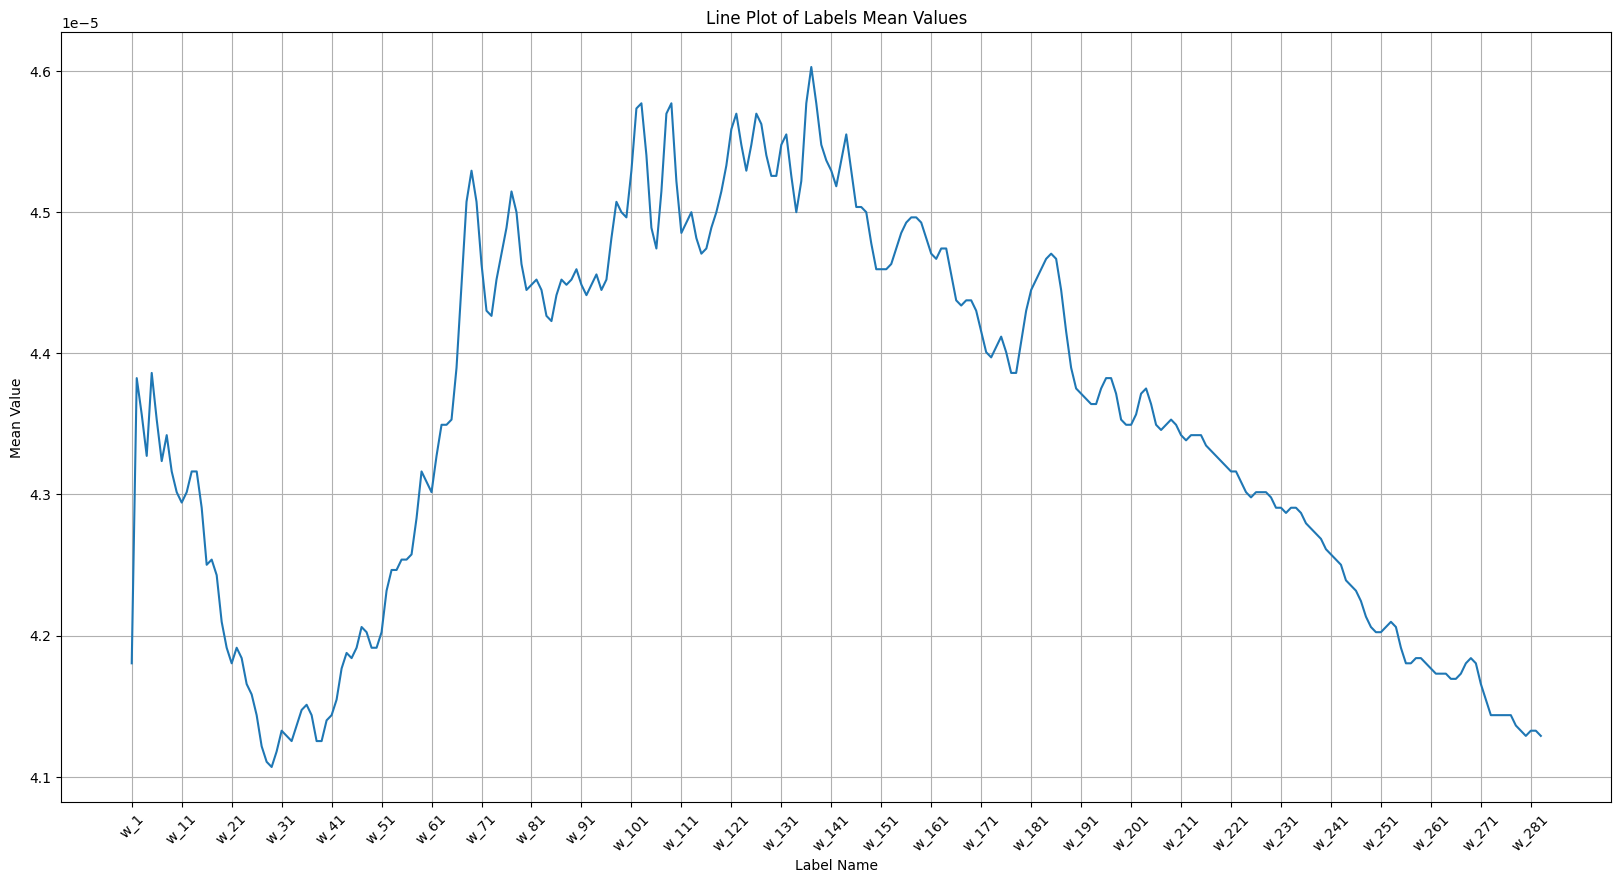

In [7]:
labels[0]

In [1]:
from models.BasicCNN import CNN
from torchinfo import summary
import torch
import dataloader

model = CNN()
summary(model, (283, 187))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [1]                       --
├─Sequential: 1-1                        [512, 93]                 --
│    └─Conv1d: 2-1                       [512, 187]                435,200
│    └─ReLU: 2-2                         [512, 187]                --
│    └─AvgPool1d: 2-3                    [512, 93]                 --
├─Sequential: 1-2                        [1024, 46]                --
│    └─Conv1d: 2-4                       [1024, 93]                1,573,888
│    └─ReLU: 2-5                         [1024, 93]                --
│    └─AvgPool1d: 2-6                    [1024, 46]                --
├─Sequential: 1-3                        [2048, 23]                --
│    └─Conv1d: 2-7                       [2048, 46]                6,293,504
│    └─ReLU: 2-8                         [2048, 46]                --
│    └─AvgPool1d: 2-9                    [2048, 23]               